In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, scale
import matplotlib.pyplot as plt


In [5]:
google = pd.read_csv('../data/transactions/Tech/GOOG.csv')  
google = google.drop(['Date'],axis=1)
google=google.astype('float64')
cl = np.array(google['Low'])
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.08592478],
       [0.08375991],
       [0.08474158],
       ...,
       [0.67018629],
       [0.71742963],
       [0.70498414]])

In [6]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
train_size = int(X.shape[0]*0.80)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
250
1000
250


In [10]:
# basic model

model = Sequential() # most common
model.add(LSTM(256, input_shape = (7,1))) 
model.add(Dense(1))
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
model.compile(optimizer='adam', loss='mse') 
callback = EarlyStopping(monitor='val_loss', patience=10,verbose=1,mode='auto')
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False,callbacks=[callback])

Train on 1000 samples, validate on 250 samples
Epoch 1/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0043 - val_loss: 0.0022
Epoch 2/300
1000/1000 [==============================] - 1s 803us/step - loss: 0.0038 - val_loss: 0.0022
Epoch 3/300
1000/1000 [==============================] - 1s 814us/step - loss: 0.0060 - val_loss: 0.0021
Epoch 4/300
1000/1000 [==============================] - 1s 839us/step - loss: 0.0012 - val_loss: 0.0027
Epoch 5/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 6/300
1000/1000 [==============================] - 1s 940us/step - loss: 6.3590e-04 - val_loss: 0.0019
Epoch 7/300
1000/1000 [==============================] - 1s 807us/step - loss: 8.1838e-04 - val_loss: 0.0023
Epoch 8/300
1000/1000 [==============================] - 1s 790us/step - loss: 5.7519e-04 - val_loss: 0.0017
Epoch 9/300
1000/1000 [==============================] - 1s 799us/step - loss: 4.1421e-04 - val_loss: 0.0

Epoch 75/300
1000/1000 [==============================] - 1s 838us/step - loss: 2.6293e-04 - val_loss: 7.6854e-04
Epoch 76/300
1000/1000 [==============================] - 1s 782us/step - loss: 2.5960e-04 - val_loss: 7.6109e-04
Epoch 77/300
1000/1000 [==============================] - 1s 782us/step - loss: 2.5639e-04 - val_loss: 7.5405e-04
Epoch 78/300
1000/1000 [==============================] - 1s 787us/step - loss: 2.5347e-04 - val_loss: 7.4741e-04
Epoch 79/300
1000/1000 [==============================] - 1s 769us/step - loss: 2.5100e-04 - val_loss: 7.4117e-04
Epoch 80/300
1000/1000 [==============================] - 1s 768us/step - loss: 2.4912e-04 - val_loss: 7.3532e-04
Epoch 81/300
1000/1000 [==============================] - 1s 777us/step - loss: 2.4795e-04 - val_loss: 7.2988e-04
Epoch 82/300
1000/1000 [==============================] - 1s 800us/step - loss: 2.4759e-04 - val_loss: 7.2498e-04
Epoch 83/300
1000/1000 [==============================] - 1s 759us/step - loss: 2.4847e-

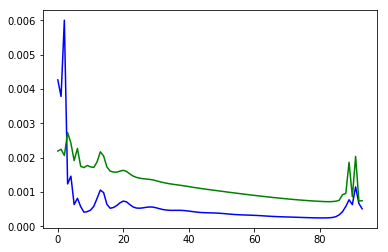

In [16]:
plt.plot(history.history['loss'],color="blue")
plt.plot(history.history['val_loss'],color="green")
plt.show()

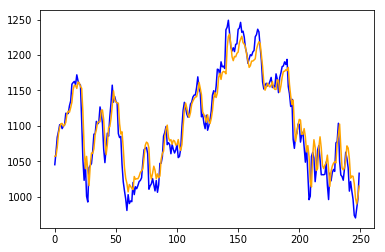

In [43]:
Xt = model.predict(X_test)

real = scl.inverse_transform(y_test.reshape(-1,1))
prediction = scl.inverse_transform(Xt)
plt.plot(real,color="blue")
plt.plot(prediction,color="orange")
plt.show()

In [46]:
def precentage(prediction, real,stock, n):
    pred = prediction -real
    pred[pred>=0]=1
    pred[pred<0]=0 
    print(pred[:100])
    t = len(pred)
    value = pd.Series(stock['Close']-stock['Close'].shift(1), index=stock.index) 
    value = value.bfill() 
    value[value>=0]=1
    value[value<0]=0 
    val = np.array(value)
    test_val = val[n:]
    countTrue = 0
    for i in range(t):
        if pred[i][0] == test_val[i]:
            countTrue +=1
    return countTrue/t

In [47]:
precentage(prediction, real,google, train_size)

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


0.516